***Ex:7 --Camera Calibration with Circular Grid***

Circle grid detected!


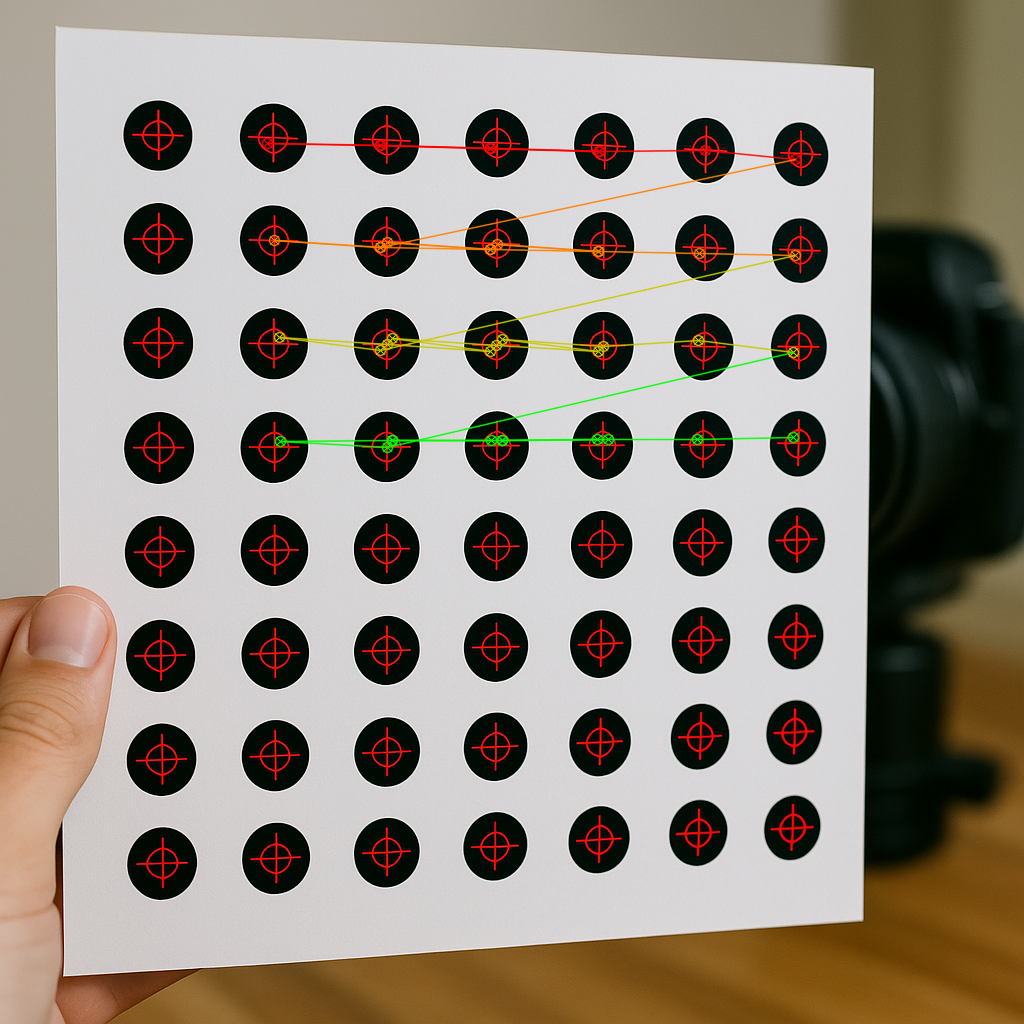


Camera matrix:
 [[8.42771694e+02 0.00000000e+00 2.34289724e+02]
 [0.00000000e+00 1.16394576e+03 7.82514015e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion coefficients:
 [[ 1.27236706e+01  5.72137972e+01  1.55170253e+00  2.16530343e-01
  -3.07146467e+02]]

Undistorted image:


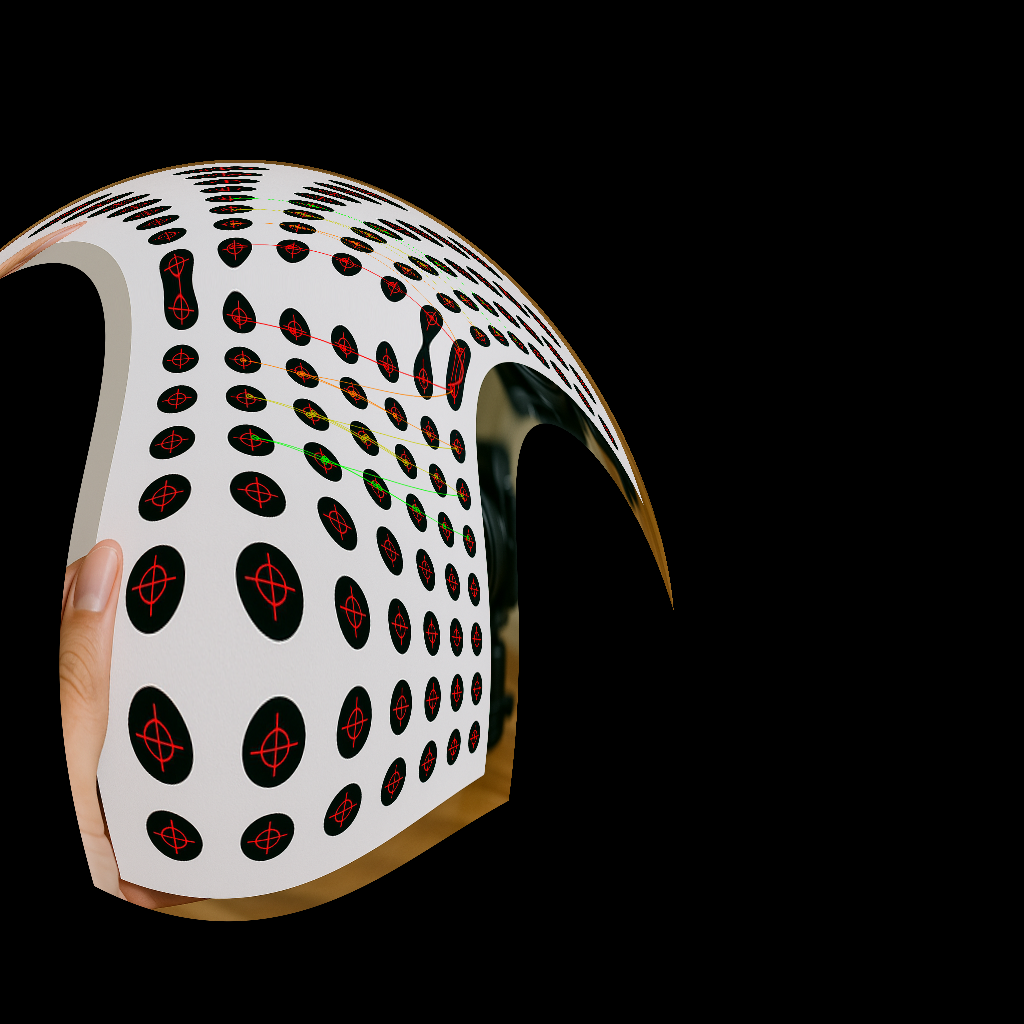

In [ ]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

# Define the dimensions of the grid (number of inner corners)
pattern_size = (11, 4)  # columns x rows

# Prepare 3D real-world points like (0,0,0), (1,0,0), (2,0,0), ...
objp = np.zeros((np.prod(pattern_size), 3), np.float32)
objp[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = []  # 3D points in real world
imgpoints = []  # 2D points in image plane

# Simulate image loading
# In real use, capture images from camera or use: glob.glob('calib_images/*.png')
# Here, let's load the one we generated earlier
img = cv2.imread('/content/ChatGPT Image code.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Try to find the circle grid
ret, centers = cv2.findCirclesGrid(gray, pattern_size, flags=cv2.CALIB_CB_SYMMETRIC_GRID)

if ret:
    print("Circle grid detected!")

    # Draw and display the detected pattern
    cv2.drawChessboardCorners(img, pattern_size, centers, ret)
    cv2_imshow(img)

    # Save points
    objpoints.append(objp)
    imgpoints.append(centers)

    # Camera calibration (just for 1 image here — not accurate, but for demo)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    print("\nCamera matrix:\n", mtx)
    print("\nDistortion coefficients:\n", dist)

    # Undistort the image
    undistorted_img = cv2.undistort(img, mtx, dist, None, mtx)
    print("\nUndistorted image:")
    cv2_imshow(undistorted_img)

else:
    print("Circle grid not detected.")

***Ex:8 --Pose Estimation***

In [ ]:
# Step 1: Install required libraries (run this once at the top)
!pip uninstall -y jax
!pip install jax[cpu]
!pip install --upgrade mediapipe --user


Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Toddler_baby.jpg to Toddler_baby.jpg


In [ ]:
!pip install --upgrade mediapipe

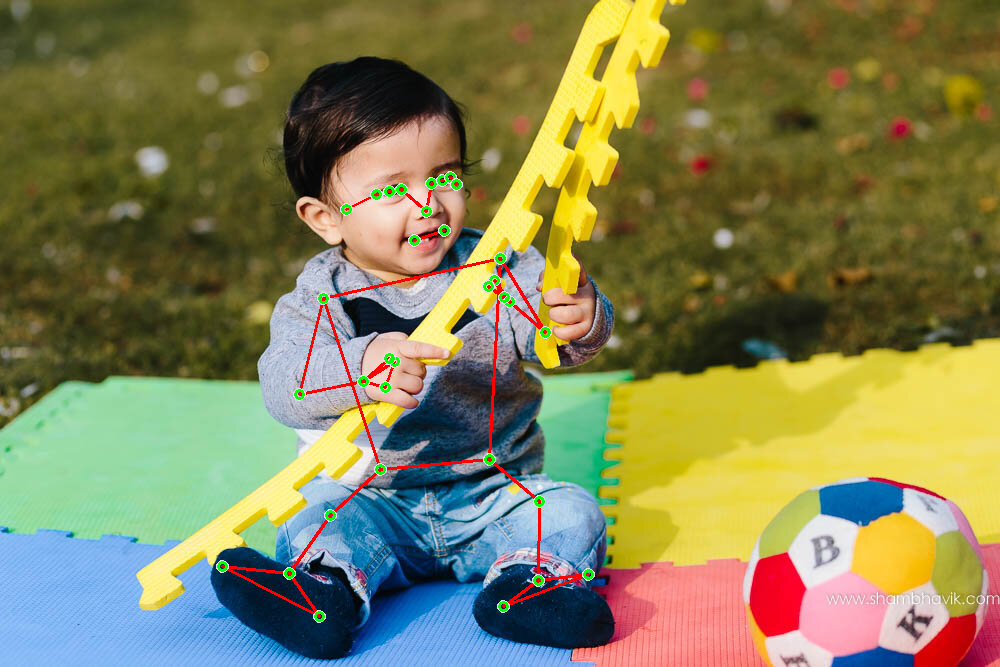

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
import numpy as np

# Initialize mediapipe pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)  # static mode for images
mp_drawing = mp.solutions.drawing_utils

# Load the image
image_path = "/content/Toddler_baby.jpg"
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"❌ Error: Could not load image at {image_path}")
else:
    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb = np.ascontiguousarray(image_rgb)

    # Run pose detection
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2),
        )

        cv2_imshow(annotated_image)
    else:
        print("⚠️ No pose landmarks detected.")

pose.close()


***Ex- 9 : 3D Reconstruction – Depth Map from Stereo Images***

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeL.jpg -O left.png
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeR.jpg -O right.png


--2025-04-23 05:55:30--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeL.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315069 (308K) [image/jpeg]
Saving to: ‘left.png’

left.png            100%[===================>] 307.68K  --.-KB/s    in 0.04s   

2025-04-23 05:55:30 (6.95 MB/s) - ‘left.png’ saved [315069/315069]

--2025-04-23 05:55:30--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeR.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315113 (308K) [image/jpeg]
Saving t

🕳️ 3D Depth Map:


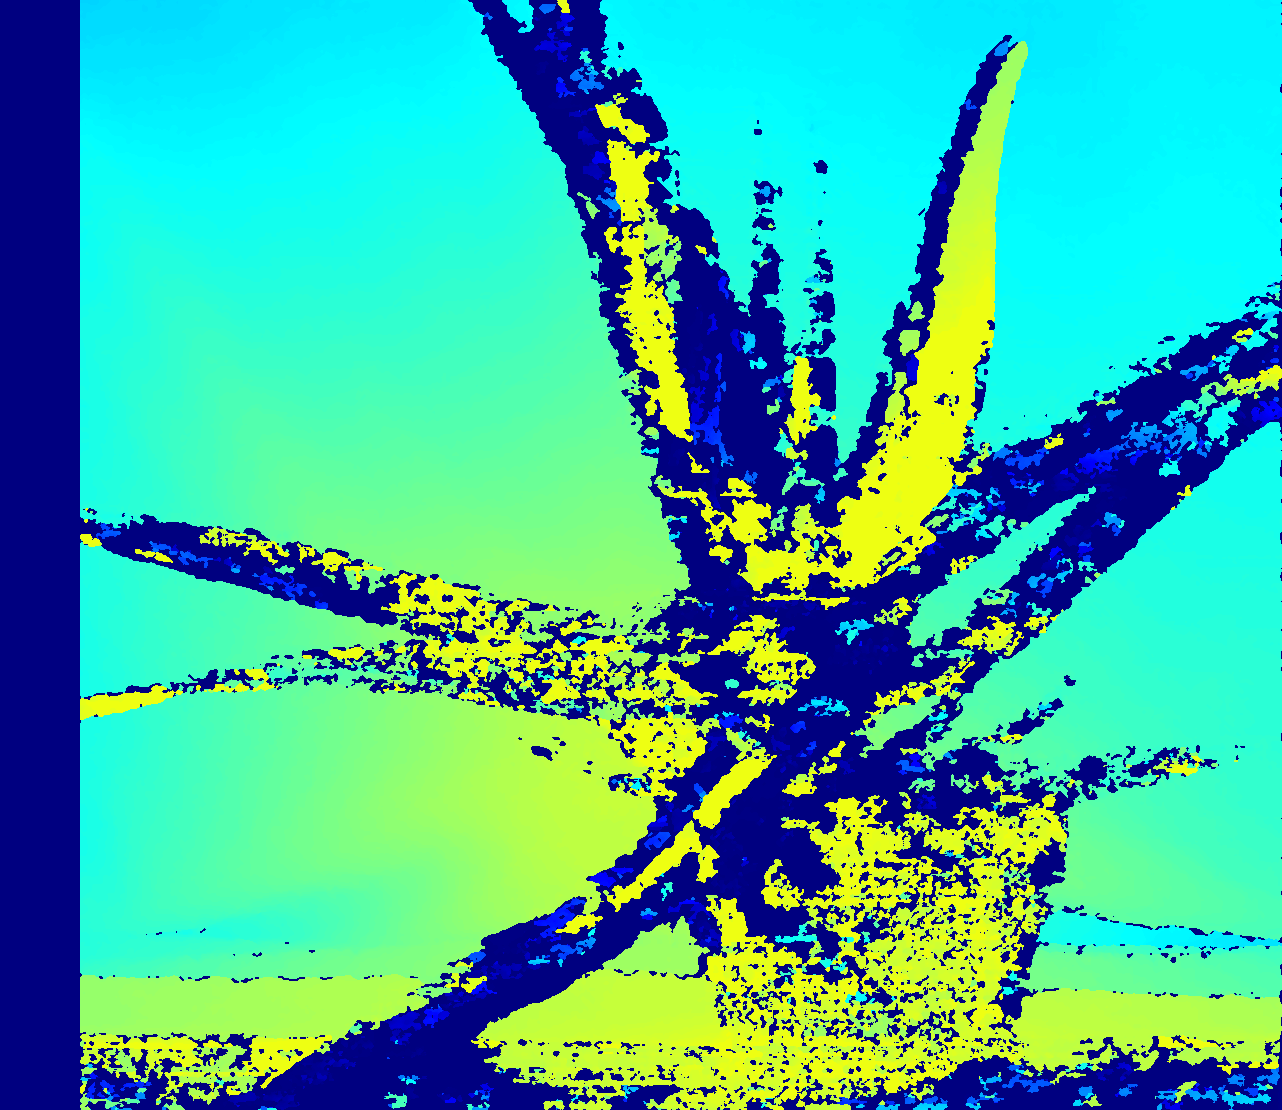

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the left and right images in grayscale
left_img = cv2.imread('/content/left.png', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('/content/right.png', cv2.IMREAD_GRAYSCALE)

# Check if images loaded correctly
if left_img is None or right_img is None:
    print("Error: One or both images couldn't be loaded. Check paths.")
else:
    # Create StereoSGBM object for depth estimation
    stereo = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=16*5,  # must be divisible by 16
        blockSize=5,
        P1=8*3*5**2,
        P2=32*3*5**2,
        disp12MaxDiff=1,
        uniquenessRatio=10,
        speckleWindowSize=100,
        speckleRange=32
    )

    # Compute disparity map
    disparity = stereo.compute(left_img, right_img).astype(np.float32) / 16.0

    # Normalize for display
    disparity_display = cv2.normalize(disparity, None, 0, 155, cv2.NORM_MINMAX)
    disparity_display = np.uint8(disparity_display)

    # Optional: apply color map to make it prettier
    color_disparity = cv2.applyColorMap(disparity_display, cv2.COLORMAP_JET)

    # Show depth map
    print("🕳️ 3D Depth Map:")
    cv2_imshow(color_disparity)


***ex 10 -Object Detection and Tracking using Kalman Filter, Camshift***


<ipython-input-1-10cae1362940>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x, y = int(predicted[0]), int(predicted[1])


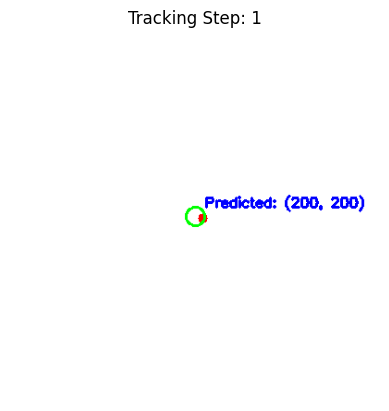

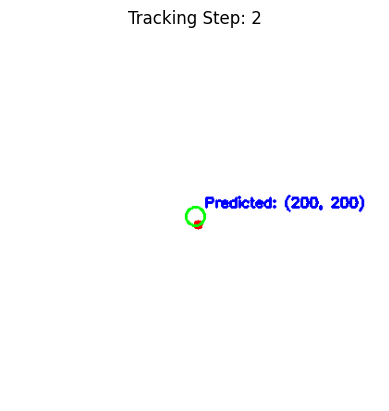

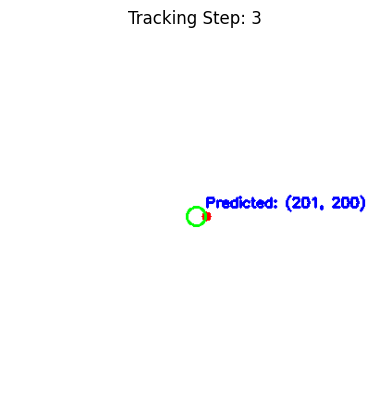

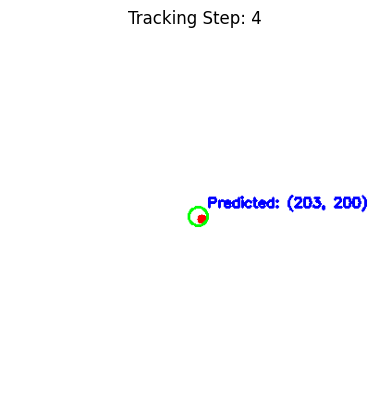

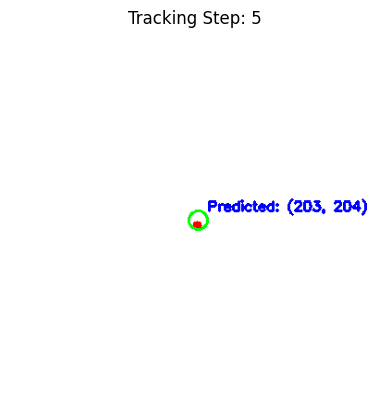

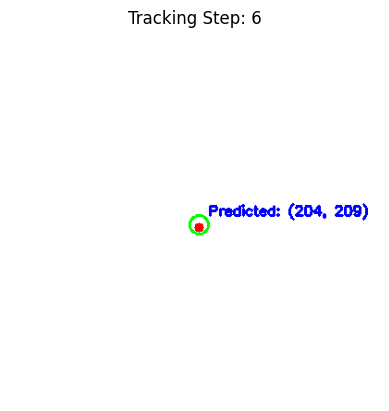

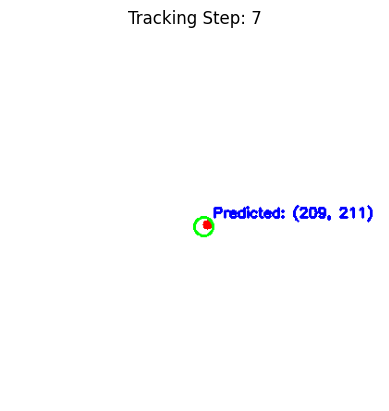

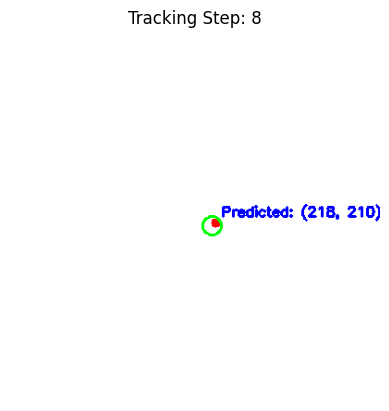

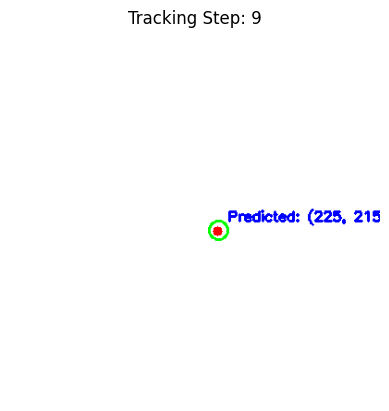

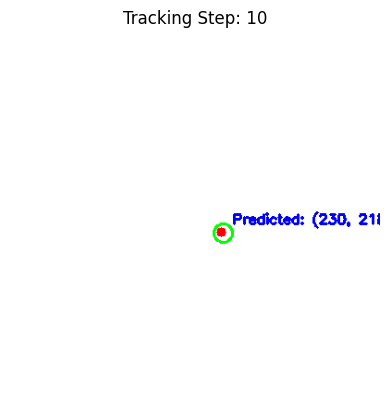

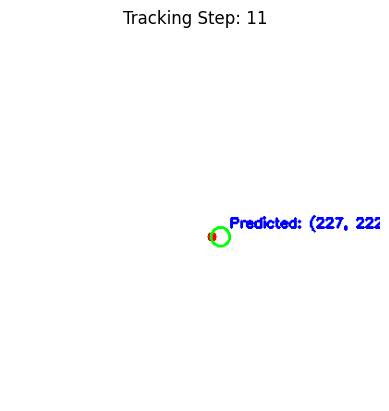

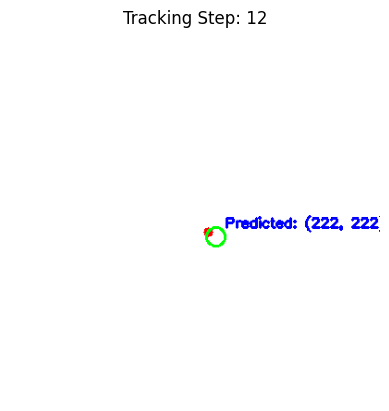

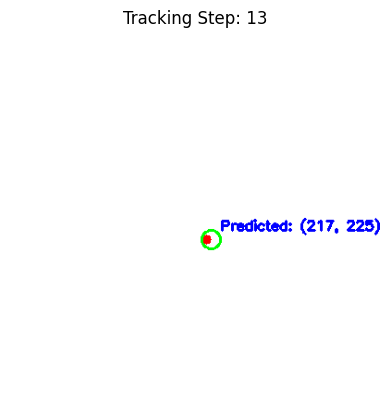

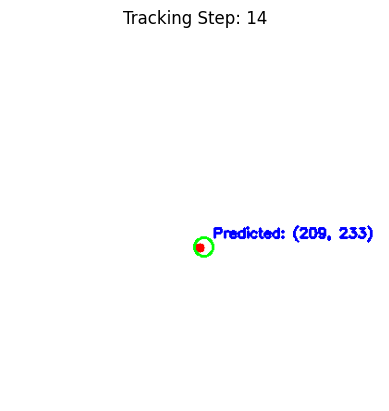

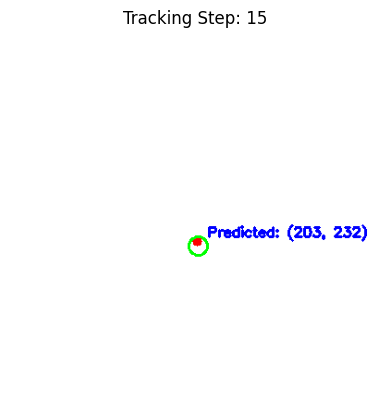

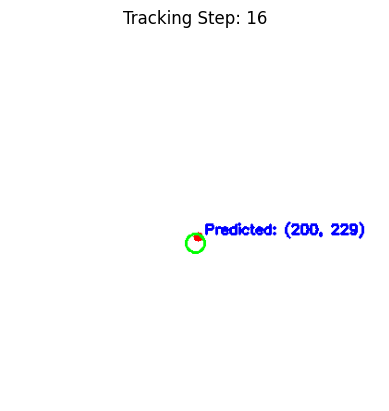

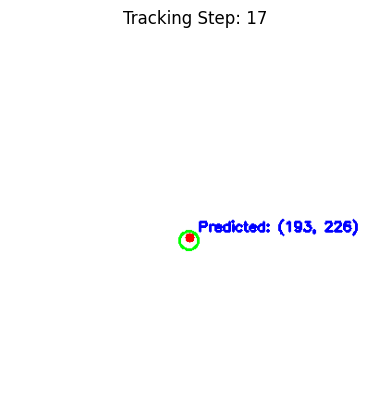

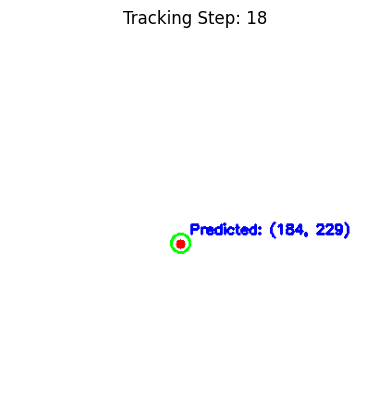

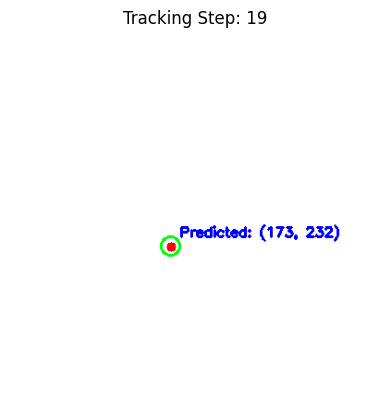

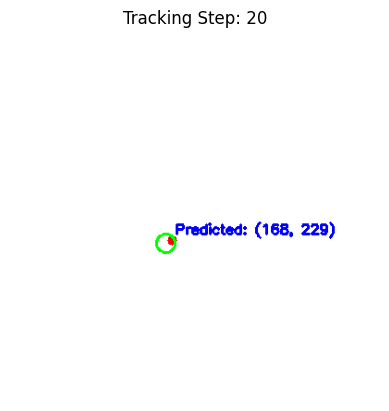

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a blank image (a white canvas)
image_width, image_height = 400, 400
frame = np.ones((image_height, image_width, 3), dtype=np.uint8) * 255  # white background

# Step 2: Kalman Filter setup
kalman = cv2.KalmanFilter(4, 2)  # 4 state variables (x, y, dx, dy), 2 measurements (x, y)
kalman.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
kalman.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
kalman.processNoiseCov = np.eye(4, dtype=np.float32) * 0.03

# Initial state (for Kalman Filter)
kalman.statePre = np.array([[200], [200], [0], [0]], dtype=np.float32)  # Starting at the center (200, 200)

# Step 3: Simulate object movement (this can be replaced with real detection)
detected_x, detected_y = 200, 200  # Starting point

# Step 4: Loop for 20 steps to simulate movement and Kalman tracking
for step in range(20):
    # Simulate the object moving (just adding random noise)
    detected_x += np.random.randint(-10, 10)  # Simulate movement in x
    detected_y += np.random.randint(-10, 10)  # Simulate movement in y

    # Kalman Filter correction step (Measurement update)
    measured = np.array([[np.float32(detected_x)], [np.float32(detected_y)]])
    kalman.correct(measured)

    # Kalman Filter prediction step (predict next position)
    predicted = kalman.predict()
    x, y = int(predicted[0]), int(predicted[1])

    # Step 5: Draw the predicted point on the frame
    frame = np.ones((image_height, image_width, 3), dtype=np.uint8) * 255  # Clear the frame (white background)
    cv2.circle(frame, (detected_x, detected_y), 5, (0, 0, 255), -1)  # Detected point (red)
    cv2.circle(frame, (x, y), 10, (0, 255, 0), 2)  # Predicted point (green)
    cv2.putText(frame, f'Predicted: ({x}, {y})', (x+10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Step 6: Display the result using Matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.title(f"Tracking Step: {step + 1}")
    plt.axis('off')  # Turn off axis labels for a cleaner view
    plt.show()

    # Optional: Add a small delay to simulate real-time tracking
    plt.pause(0.5)  # Pause for 0.5 seconds before showing the next frame
